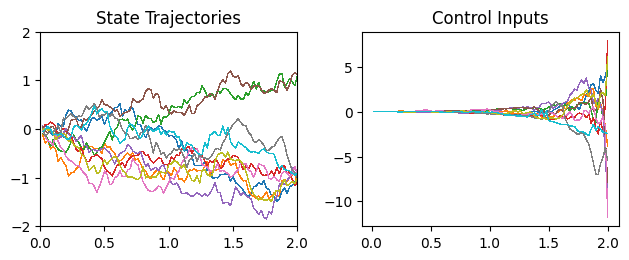

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nu = 0.5
R = 1  # Not used further in the code
ti = 0    # initial time
tf = 2    # horizon time
n = 100   # number of time discretization steps

# dt is computed as (tf-ti)/n as in the Matlab code
dt = (tf - ti) / n

N = 10    # number of trajectories

# Initialize arrays to store control inputs and state trajectories
u_all = np.zeros((N, n))
x_all = np.zeros((N, n))

# Initialize the state variable x. Shape (N, 1) is used for clarity.
x = np.zeros((N, 1))

# Time stepping loop
for i in range(n):
    # Compute the current time. Matlab uses (i-1)*dt; here we start i at 0.
    t = ti + i * dt
    T = tf - t
    # Compute control input u.
    # Note: x/(nu*T) is computed elementwise.
    u = 1 / T * (np.tanh(x / (nu * T)) - x)
    # Update the state using Euler-Maruyama method for the stochastic term.
    x = x + u * dt + np.sqrt(nu * dt) * np.random.randn(N, 1)
    # Store the computed u and updated x.
    u_all[:, i] = u.flatten()
    x_all[:, i] = x.flatten()

# Create a time vector similar to Matlab's dt*(1:n)
time_vec = dt * np.arange(1, n + 1)

# Plot the state trajectories
plt.subplot(2, 2, 1)
plt.plot(time_vec, x_all.T, linewidth=0.2, antialiased=False)
plt.axis([ti, tf, -2, 2])
plt.title('State Trajectories')

# Plot the control inputs
plt.subplot(2, 2, 2)
plt.plot(time_vec, u_all.T,  linewidth=0.2, antialiased=False)
plt.title('Control Inputs')

plt.tight_layout()
plt.show()


MATLAB / Octave version below!

In [4]:
!apt-get update
!apt-get install -y octave

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [69.0 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,375 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,753 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcont

In [5]:
%%writefile exercise4.m
graphics_toolkit("gnuplot");  % Ensure we can render plots in Octave

clear all
nu=0.5;
R=1;
ti=0;   % initial time
tf=2;   % horizon time
n=100; % number of time discretization steps
dt=(tf-ti)/(n-1);
dt=(tf-ti)/n;
N=10; % number of trajectories
u_all=zeros(N,n);
x_all=zeros(N,n);
x=zeros(N,1);
for i=1:n,
	t=ti+(i-1)*dt;
	T=tf-t;
	u=1/T*(tanh(x/nu/T)-x);
	x=x+u*dt+sqrt(nu*dt)*randn(N,1);
	u_all(:,i)=u;
	x_all(:,i)=x;
end;
subplot(2,2,1)
plot(dt*(1:n),x_all')
axis([ti tf -2 2])
subplot(2,2,2)
title('State Trajectories (Octave)')

plot(dt*(1:n),u_all')
%axis([ti tf -2 2])
title('Control Inputs (Octave)')

% Save the figure to a PNG file
print -dpng 'my_plot.png'


Writing exercise4.m


In [7]:
!octave exercise4.m

octave: X11 DISPLAY environment variable not set
octave: disabling GUI features

The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.
                                                                               
           |------------------------|         Control Inputs (Octave)--|       
        2 +|+   +      +     +   +-+|     10 +|+   +      +     +   +-*|       
          +|    +$     $$$$$$# ### +|        +|    +      +     +     $|       
        1 +|+  $%%%%=====#####=#####|    

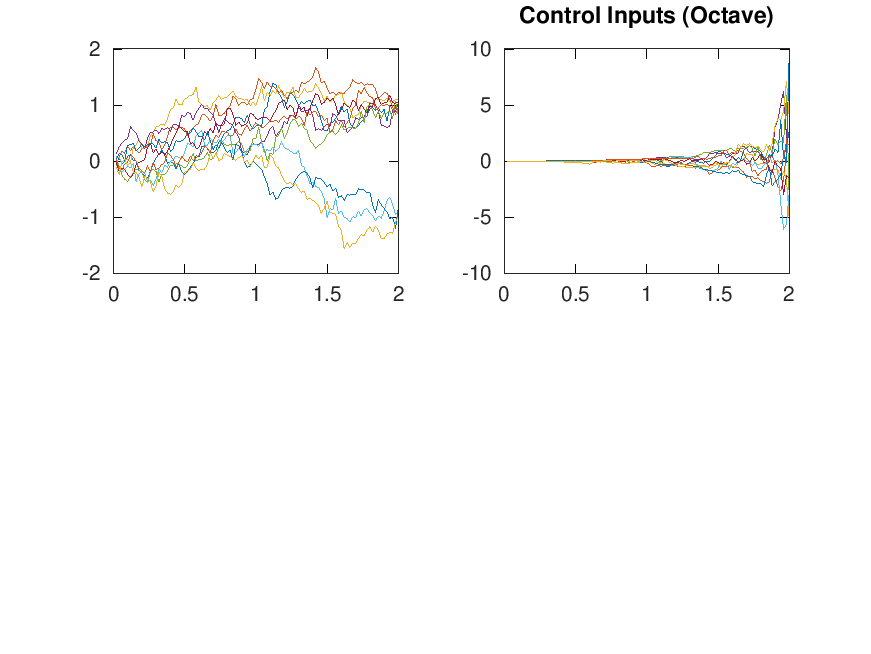

In [8]:
from IPython.display import Image
Image('my_plot.png')